In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [ ]:
def plot_slices(img, title='', box=None):
    print(title)
    img.shape[2]
    fig, axs = plt.subplots(img.shape[2]//4,4, figsize=(16, img.shape[2]//4*4), sharex=True, sharey=True)
    for index,ax in enumerate(axs.flat):
        ax.imshow(img[:,:,index,0], cmap='gray')

In [ ]:
x = np.load('./temp/generator/class/mediastinal/'+'469_x_train.npy')

In [ ]:
y = np.load('./temp/generator/mediastinal/72_y_train.npy')

In [ ]:
y_class = np.load('./temp/generator/class/mediastinal/'+'469_y_train.npy')

In [ ]:
y_class

In [ ]:
index =4
z =x[index].copy().astype(np.float64)
#z[y[index]==0] = -0.25
plot_slices(z)
#plot_slices(x[index].copy().astype(np.float64))

In [ ]:
plot_slices(y[2].astype(np.float64))

In [ ]:
y_class[10]

In [ ]:
import pandas as pd
df = pd.read_csv('./output/predict_lung_test.csv')

In [ ]:
df

In [ ]:
import pandas as pd
from visual_utils import VisualUtil
df = pd.read_csv("./output/predict_mediastinal_test_5050.csv")

In [ ]:
seriesuid =696741
temp = df[df['seriesuid'] == seriesuid]


In [ ]:
import h5py
import numpy as np
with h5py.File('./temp/preprocess/mediastinal/'+str(seriesuid)+'.h5', 'r') as hf:
        ret_img = hf['img'].value
        ret_img = ret_img.astype(np.float64)
        VisualUtil.plot_all_slices_with_mask(ret_img,temp)

In [ ]:
anno = pd.read_csv("../dataset/chestCT_round1_annotation.csv")

In [ ]:
t['area'].plot.hist(bins=50)

In [ ]:
import os
import pickle
import pandas as pd
from config import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

cache_file = '{}/all_meta_cache.meta'.format(PREPROCESS_PATH)
if os.path.exists(cache_file):
    print('get meta_dict from cache')
    with open(cache_file, 'rb') as f:
        metas = pickle.load(f)
anno = pd.read_csv("../dataset/chestCT_round1_annotation.csv")

In [ ]:
#636990 510918 688279

seriesuid =517639
temp = anno[(anno['seriesuid'] == seriesuid) & ((anno['label'] == 31) | (anno['label'] == 32))]
origin = metas[str(seriesuid)]['origin']
temp.loc[:,'coordX'] = temp['coordX'] - origin[0]
temp.loc[:,'coordY'] = temp['coordY'] - origin[1]
temp.loc[:,'coordZ'] = temp['coordZ'] - origin[2]

In [ ]:
temp

In [ ]:
from skimage import morphology, measure, segmentation,filters
import scipy.ndimage
import h5py
import numpy as np
from visual_utils import VisualUtil
area_threshold = 100000
threshold = 0.74
with h5py.File('./temp/preprocess/mediastinal_without_mask/'+str(seriesuid)+'.h5', 'r') as hf:
        ret_img = hf['img'].value
        ret_img = ret_img.astype(np.float64)
        temp_img = ret_img.copy()
        
        mask = temp_img>threshold
        #mask = morphology.binary_erosion(mask, selem=np.ones((2, 1, 1)))#binary_opening  dilation
        mask = morphology.binary_closing(mask, selem=np.ones((3, 3, 3)))#binary_opening  dilation
        #edges = filters.hessian(mask)
        mask = scipy.ndimage.binary_fill_holes(mask)
        labels = measure.label(mask)
        regions = measure.regionprops(labels)
        for r in regions:
            if r.area>area_threshold:
                for c in r.coords:
                    temp_img[c[0], c[1], c[2]] = 0
        #temp_img[temp_img<0.36] = -0.25
        #temp_img = np.clip(temp_img,0.36,None)
        total_w = temp_img.shape[0]
        total_h = temp_img.shape[1]
#         outside = [0.1,0.9,0.2,0.8]
#         remove_outside = temp_img[int(outside[0]*total_w):int(outside[1]*total_w),
#                                   int(outside[2]*total_h):int(outside[3]*total_h),:]
#         VisualUtil.plot_all_slices(remove_outside)#temp
        VisualUtil.plot_all_slices_with_mask(temp_img,temp)

In [ ]:
10000**(1/3)

In [1]:
import numpy as np
from visual_utils import VisualUtil


In [3]:

x = np.load('./temp/generator/seg/lung/1_x_train.npy')
y = np.load('./temp/generator/seg/lung/1_y_train.npy')
c =  np.load('./temp/generator/seg/lung/1_yclass_train.npy')

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [8]:
index=7
np.sum(y[index])

2388.0

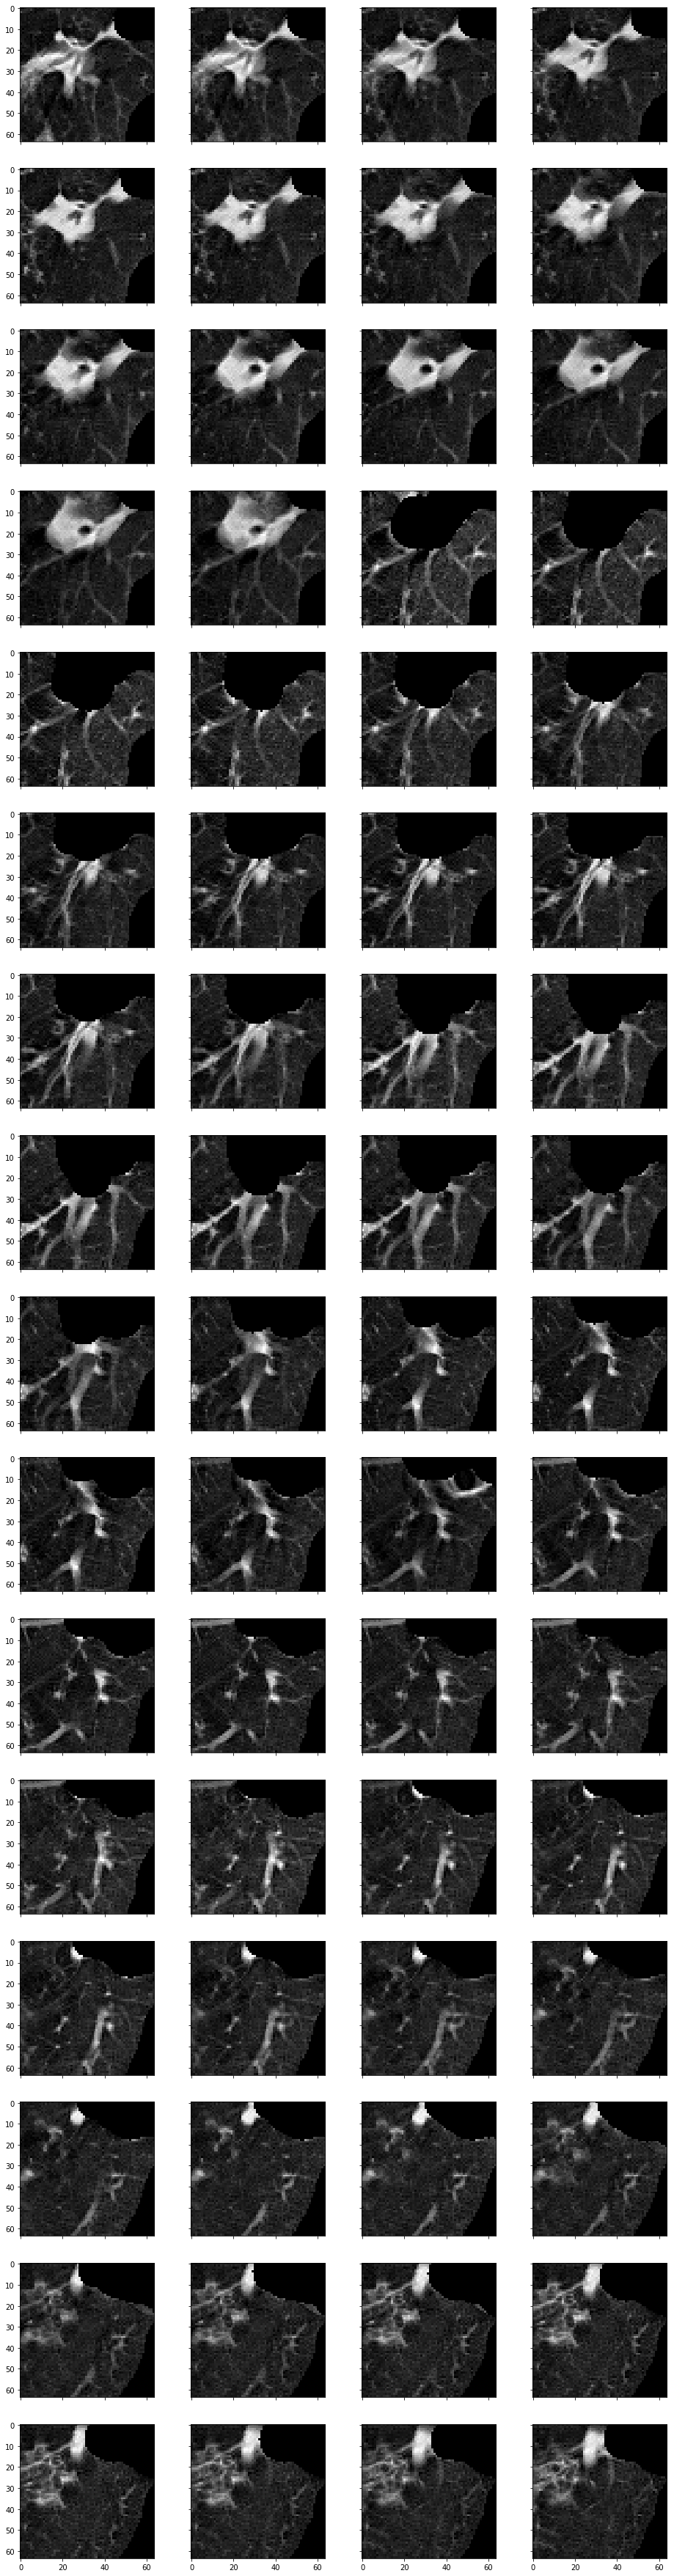

In [10]:

VisualUtil.plot_all_slices(x[index,:,:,:,0].astype(np.float64))

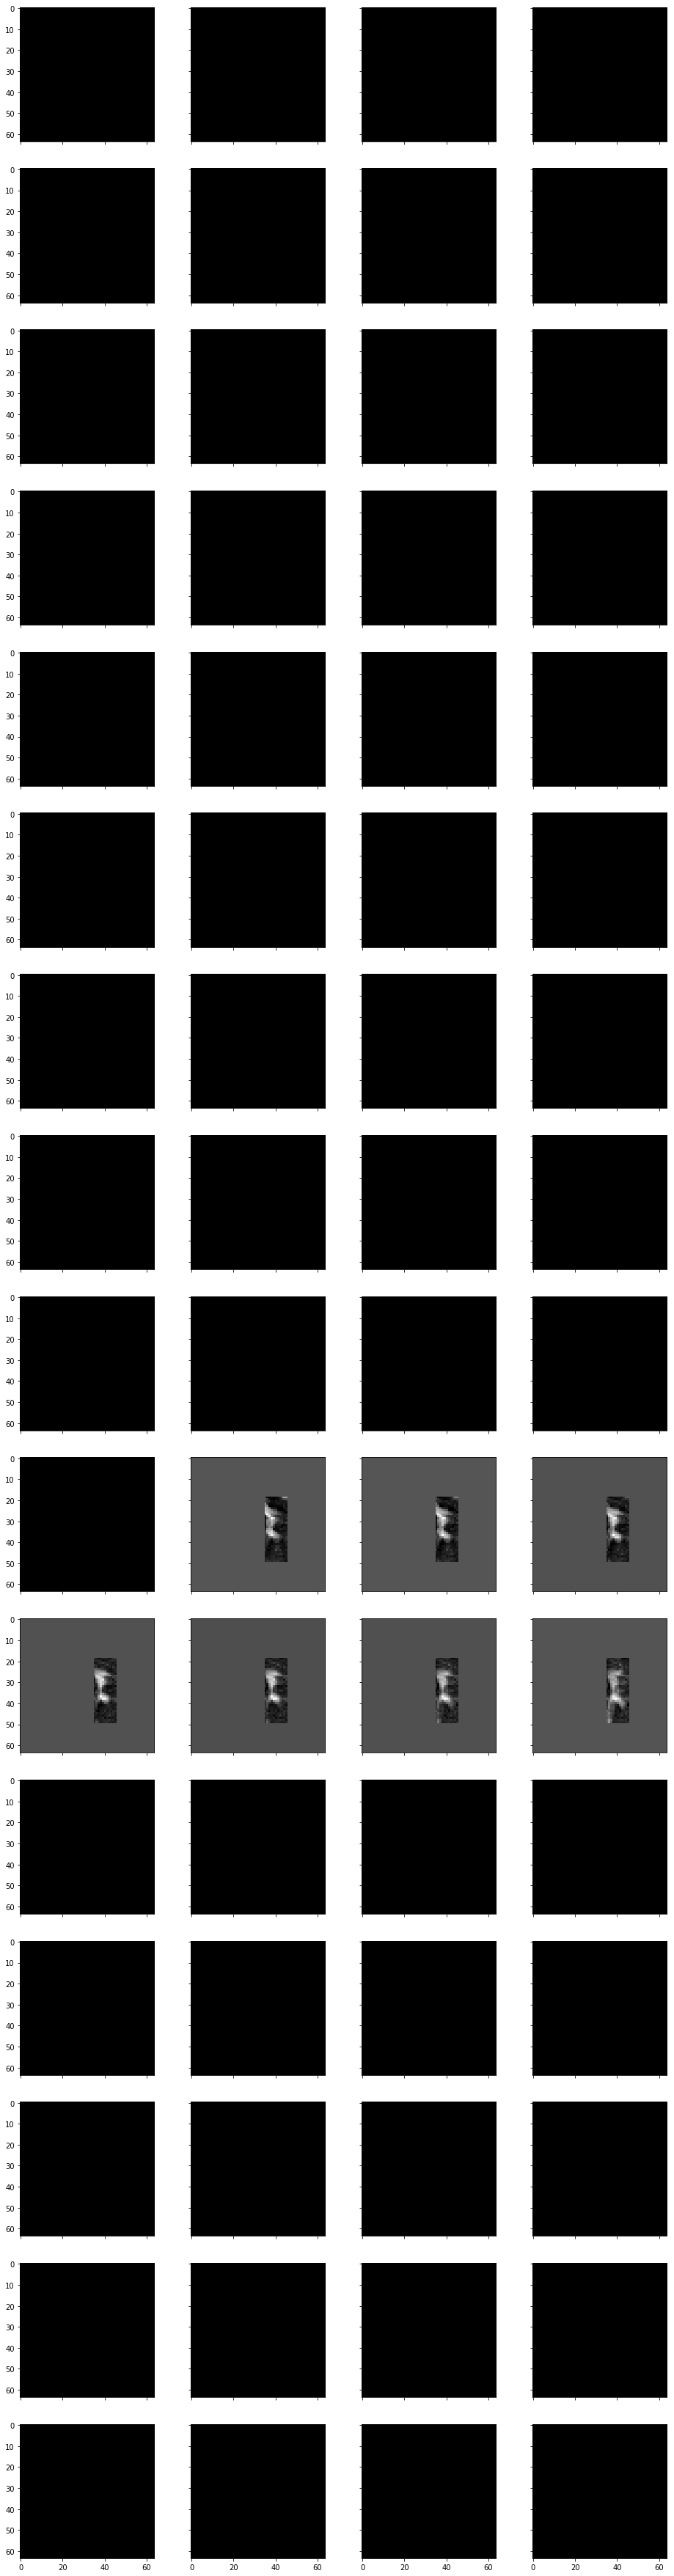

In [11]:
VisualUtil.plot_all_slices(x[index,:,:,:,0]*y[index,:,:,:,0].astype(np.float64))

In [ ]:
import pandas as pd
df = pd.read_csv('./output/predict_mediastinal_test.csv')

In [ ]:
index = 11
seriesuid = int(df.iloc[index]['seriesuid'])
df.iloc[index]

In [ ]:
import SimpleITK as sitk

itk_img = sitk.ReadImage('../dataset/testset/'+str(seriesuid)+'.mhd')
img = sitk.GetArrayFromImage(itk_img)  # (depth, height, width)
img = np.transpose(img, (2, 1, 0))  # (width, height, depth)

origin = np.array(itk_img.GetOrigin())
spacing = np.array(itk_img.GetSpacing())

In [ ]:
x = int((df.iloc[index]['coordX'] - origin[0])/spacing[0])
y = int((df.iloc[index]['coordY'] - origin[1])/spacing[1])
z = int((df.iloc[index]['coordZ'] - origin[2])/spacing[2])
radim = 20
t = img[x-radim:x+radim,y-radim:y+radim,z:z+radim]
VisualUtil.plot_all_slices(t)
#(x,y,z)

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from config import *
import os
import tensorflow as tf; print('tensorflow', tf.__version__)
import keras; print('keras', keras.__version__)
# set gpu visible environment variable
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf.ConfigProto()

# gpu allow_growth
config.gpu_options.allow_growth = True
keras.backend.set_session(tf.Session(config=config))

tensorflow 1.14.0
keras 2.2.4


Using TensorFlow backend.


In [4]:
from predict import check_detect_result_accuracy

In [ ]:
check_detect_result_accuracy('meiastianl','./weight/mediastinal_seg_0.5930.hdf5',0.8,[50,50])

In [22]:
check_detect_result_accuracy('lung','./weight/lung_seg_0.6646.hdf5',0.8,[50,50])

total:1470
process:0, seriesuid:672186
process:1, seriesuid:656478
process:2, seriesuid:384702
process:3, seriesuid:675949
process:4, seriesuid:696430
process:5, seriesuid:647735
process:6, seriesuid:689099
process:7, seriesuid:696872
process:8, seriesuid:375656
process:9, seriesuid:656158
process:10, seriesuid:381892
Found Right Focus:24
Found Wrong Focus:1221
Total Ground-truth Focus:51
finished


{'375656_2728_5.0',
 '375656_2729_5.0',
 '375656_2731_5.0',
 '375656_2734_5.0',
 '384702_3822_5.0',
 '384702_3824_5.0',
 '384702_3825_5.0',
 '384702_3826_1.0',
 '384702_3829_1.0',
 '384702_3831_5.0',
 '384702_3832_5.0',
 '384702_3834_1.0',
 '384702_3835_1.0',
 '384702_3837_1.0',
 '384702_3842_1.0',
 '384702_3843_5.0',
 '647735_3165_1.0',
 '656158_8549_5.0',
 '656478_9355_5.0',
 '672186_12020_5.0',
 '672186_12021_1.0',
 '675949_1846_5.0',
 '696430_2248_5.0',
 '696430_2249_1.0'}

In [16]:
postive_focus_set_1 = check_detect_result_accuracy('lung','./weight/lung_seg_jijie_0.49.hdf5',0.8,[50,50])

total:1470
process:0, seriesuid:672186


/tf/tianchi/martin/predict.py:326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  focus_records['coordX'] = focus_records['coordX'] - origin[0]
/tf/tianchi/martin/predict.py:327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  focus_records['coordY'] = focus_records['coordY'] - origin[1]
/tf/tianchi/martin/predict.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

process:1, seriesuid:656478
process:2, seriesuid:384702
process:3, seriesuid:675949
process:4, seriesuid:696430
process:5, seriesuid:647735
process:6, seriesuid:689099
process:7, seriesuid:696872
process:8, seriesuid:375656
process:9, seriesuid:656158
process:10, seriesuid:381892
Found Right Focus:21
Found Wrong Focus:379
Total Ground-truth Focus:51
finished


In [17]:
postive_focus_set_5 = check_detect_result_accuracy('lung','./weight/lung_seg_suotiao_0.61.hdf5',0.8,[50,50])

total:1470
process:0, seriesuid:672186
process:1, seriesuid:656478
process:2, seriesuid:384702
process:3, seriesuid:675949
process:4, seriesuid:696430
process:5, seriesuid:647735
process:6, seriesuid:689099
process:7, seriesuid:696872
process:8, seriesuid:375656
process:9, seriesuid:656158
process:10, seriesuid:381892
Found Right Focus:24
Found Wrong Focus:1625
Total Ground-truth Focus:51
finished


In [21]:

tt = postive_focus_set_1.union(postive_focus_set_5)
len(tt)


29

In [ ]:
import numpy as np
np.where(np.array([[1,2,3,4],[5,6,7,8]])>3)

In [ ]:
np.argmax(np.array([[1,2,3,4],[5,6,7,8]]))

In [1]:
import pandas as pd
df_lung = pd.read_csv('./output/predict_lung_test.csv')

In [2]:
df_ma = pd.read_csv('./output/predict_mediastinal_test.csv')

In [9]:
d1 =df_lung[df_lung['probability']>0.95]
d2 = df_ma[df_ma['probability']>0.95]

In [11]:
pd.concat([d1,d2]).to_csv('./output/predict_test_095.csv')

In [3]:
import numpy as np
np.load('./temp/generator/seg/lung/54_yclass_val.npy')

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [2]:
from unet import UNet
detect_net = UNet()
detect_model = detect_net.get_model(0.1)
detect_model.load_weights('./weight/lung_seg_jijie_0.49.hdf5')

ValueError: You are trying to load a weight file containing 19 layers into a model with 37 layers.